# Import Libraries and Data

In [2]:
import helper

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
real_estate = pd.read_csv('../datasets/processed_train.csv')

In [5]:
def simple_interaction_feature(df, list_of_old_features):
    new_feature_val = 1
    for feature in list_of_old_features:
        new_feature_val = new_feature_val * df[feature]
    return new_feature_val

Time to do some reading about Real Estate:

Factors:
    Location
        Neighborhood
    Property Size
        Lot Area
        Gr Liv Area
        Total Bsmt SF
        
    

In [6]:
real_estate.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',
  

In [7]:
real_estate['pool_score'] = simple_interaction_feature(real_estate, ['pool_area','pool_qc'])

In [8]:
real_estate['garage_score'] = simple_interaction_feature(real_estate, ['garage_area','garage_qual','garage_cars','garage_cond'])

In [9]:
real_estate['fireplace_score'] = simple_interaction_feature(real_estate, ['fireplaces','fireplace_qu'])

In [10]:
real_estate['fireplace_score'] = simple_interaction_feature(real_estate, ['fireplaces','fireplace_qu'])

In [11]:
real_estate['kitchen_score'] = simple_interaction_feature(real_estate, ['kitchen_abvgr','kitchen_qual'])

In [12]:
real_estate['overall_score'] = simple_interaction_feature(real_estate, ['overall_qual','overall_cond'])

In [13]:
simple_estate = real_estate.drop(columns=['id','pid','ms_subclass','lot_frontage','lot_area','overall_cond','exter_cond','bsmt_cond',
                         'bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf',
                         'heating_qc','2nd_flr_sf','low_qual_fin_sf','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath',
                         'bedroom_abvgr','kitchen_abvgr','totrms_abvgrd','fireplaces','fireplace_qu','garage_yr_blt','garage_finish',
                         'garage_qual','garage_cond','wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch',
                         'pool_area','pool_qc','fence','misc_val','mo_sold','yr_sold'])

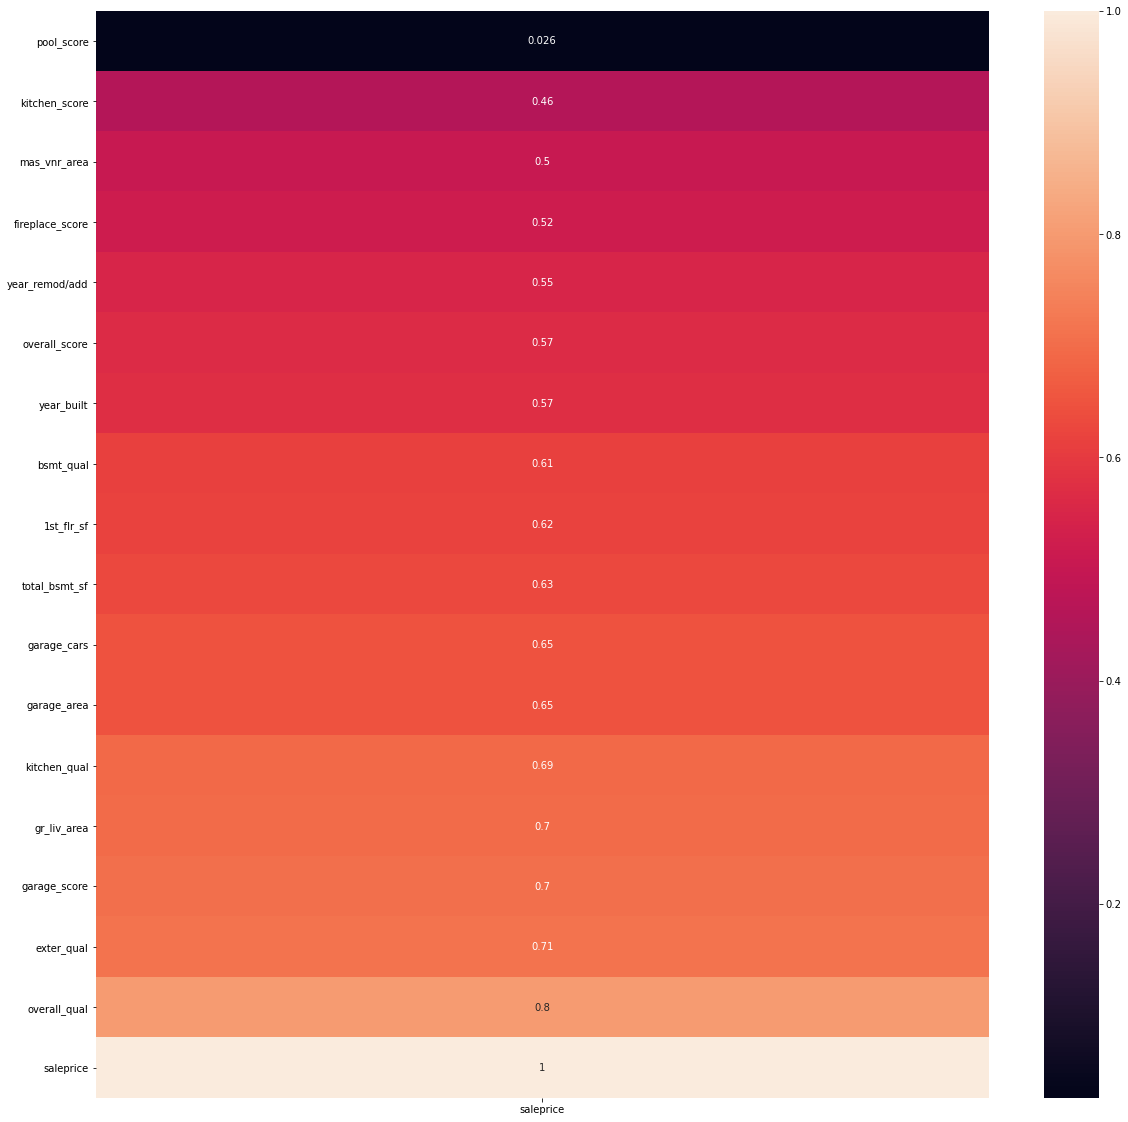

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(simple_estate.select_dtypes(include=['int64','float64']).corr().sort_values(by='saleprice')[['saleprice']],
           annot=True);

plt.savefig('corrheatmap');

# Models

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [38]:
simple_estate.drop(columns = ['pool_score','kitchen_score','overall_score','fireplace_score','garage_cars','garage_area',
], inplace=True)

In [39]:
simple_estate = simple_estate.select_dtypes(include=['int64','float64'])

In [47]:
simple_estate.columns

Index(['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'exter_qual', 'bsmt_qual', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area',
       'kitchen_qual', 'saleprice', 'garage_score'],
      dtype='object')

In [40]:
X = simple_estate.drop(columns=['saleprice'])
y = simple_estate['saleprice']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   test_size = .2)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lasso = Lasso()
ridge = Ridge()

# Ridge

In [45]:
ridge_alphas = np.logspace(0,5,100)
ridge_cv = RidgeCV(alphas = ridge_alphas, scoring = 'r2', cv=5)
ridge_cv.fit(X_train, y_train);

In [46]:
ridge_cv;

In [56]:
ridge_cv.alpha_

1.0

In [41]:
ridge = Ridge()

In [42]:
ridge.fit(X_train, y_train)

Ridge()

In [59]:
list(zip(X_train.columns,ridge.coef_))

[('overall_qual', 12189.28494574766),
 ('year_built', 67.6854076045488),
 ('year_remod/add', 79.14725744900102),
 ('mas_vnr_area', 34.96171313617838),
 ('exter_qual', 14271.099296010098),
 ('bsmt_qual', 8644.8115140173),
 ('total_bsmt_sf', 2.202913387323227),
 ('1st_flr_sf', 21.4322733412655),
 ('gr_liv_area', 37.68581873760291),
 ('kitchen_qual', 13406.161266388634),
 ('garage_score', 1.9937946291458992)]

In [44]:
scores = cross_val_score(ridge, X_train, y_train, cv=5)

In [45]:
scores.mean()

0.7960797147248158

In [46]:
predicts = ridge.predict(X_test)

In [47]:
r2_score(y_test,predicts)

0.8619608657364348

In [48]:
mean_squared_error(y_test,predicts,squared=False)

28638.464605958503

In [49]:
mean_squared_error(y_test,predicts)

820161654.986738

# Lasso

In [64]:
lasso_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas=lasso_alphas,
                  cv = 5,
                  n_jobs=-1,
                  max_iter = 100_000)

lasso_cv.fit(X_train, y_train);

In [65]:
lasso_cv.alpha_

0.001

In [66]:
lasso_cv.score(X_train, y_train)

0.8110448216139183

In [67]:
lasso_cv.score(X_test, y_test)

0.8619486489361934

In [68]:
predicts = lasso_cv.predict(X_test)
r2_score(y_test,predicts)

0.8619486489361934

In [69]:
mean_squared_error(y_test,predicts,squared=False)

28639.73186492251